In [1]:
PATH_TO_DATA="/Users/roman/Sibur_hack/data_PTR/"
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel(PATH_TO_DATA+"train.xlsx",na_values="Bad")
test=pd.read_excel(PATH_TO_DATA+"test.xlsx",na_values="Bad")

In [3]:
train.shape,test.shape

((13248, 24), (2735, 24))

In [4]:
#Пропуски есть (заглушка Bad)
train.isnull().any().any()

True

In [5]:
#Пропусков нет
test.isnull().any().any()

False

In [6]:
#Удаляю пропуски потерял 369 объектов
train.dropna(inplace=True)

In [7]:
train.shape,test.shape

((12879, 24), (2735, 24))

In [8]:
#объединяю train и test для последубщей обработки
separate=train.shape[0]

data=pd.concat([train,test],ignore_index=True)
data.shape

(15614, 24)

In [9]:
#преобзазую типы
non_time=train.columns[train.columns!="Time"].values

data[non_time]=data.drop("Time",axis=1).astype(float)

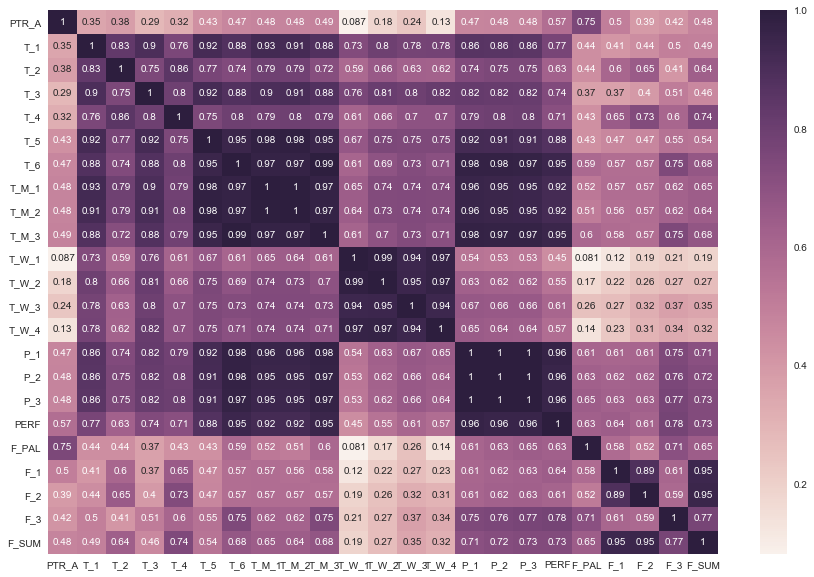

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data[:separate].corr(),annot=True);

Признаки которые сльно скорелированны:
- T_M_1 and T_M_2
- P_1 and P_2 and P_3

Признки которые слабо влияют:
- T_W_3
- T_W_2
- T_W_4
- T_W_1 

In [11]:
dataTrain=data[:separate] #Для того чтобы исследовать только train

In [12]:
dataTrain.columns

Index(['Time', 'PTR_A', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_M_1',
       'T_M_2', 'T_M_3', 'T_W_1', 'T_W_2', 'T_W_3', 'T_W_4', 'P_1', 'P_2',
       'P_3', 'PERF', 'F_PAL', 'F_1', 'F_2', 'F_3', 'F_SUM'],
      dtype='object')

In [13]:
dataTrain.describe()

,PTR_A,T_1,T_2,T_3,T_4,T_5,T_6,T_M_1,T_M_2,T_M_3,...,T_W_4,P_1,P_2,P_3,PERF,F_PAL,F_1,F_2,F_3,F_SUM
count,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,...,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000
mean,1.611405,141.724426,201.997170,152.535500,222.129145,208.535240,283.510415,284.755925,284.376819,291.596430,...,187.419673,213.147405,188.852599,184.066088,14892.788356,14.816325,12.348211,15.645264,11.000996,38.994342
std,0.853792,27.193610,47.909943,23.097179,49.697015,40.813619,55.568678,54.091403,52.808253,55.652889,...,24.720318,53.272561,47.212482,45.997771,3940.835349,6.186021,5.184556,6.549844,3.856510,14.105423
min,0.000000,10.300000,17.366667,10.400001,18.266666,13.800000,19.933332,19.766666,23.633333,25.200001,...,31.000000,0.225844,0.404667,0.752523,0.000000,-0.020616,-0.031171,-0.035624,-0.027831,-0.076815
25%,0.753219,140.000000,186.333359,152.599655,197.016594,208.000000,294.066681,288.200027,289.766693,299.166687,...,184.800003,224.885117,198.711037,192.757133,14998.616699,8.902696,10.245823,12.356518,8.635489,34.438980
50%,2.127460,144.899506,201.700012,155.601807,232.533340,213.600006,299.033386,294.499969,295.899963,307.466583,...,189.800003,226.036072,201.653976,196.533615,15917.154297,17.018534,11.417502,15.589968,12.649872,39.056183
75%,2.197627,155.999001,229.066727,160.600006,256.283401,224.899811,301.100082,305.433258,303.866669,309.899994,...,199.600006,229.003723,203.828087,199.479568,16649.006836,18.798138,15.502578,20.068577,13.958494,49.395498
max,4.582610,187.699997,292.966675,191.900009,292.000000,248.100006,306.633453,319.166656,318.299988,317.000000,...,227.900009,230.956665,207.233856,203.141281,19703.125000,26.700846,27.462790,30.416245,15.193065,66.978745


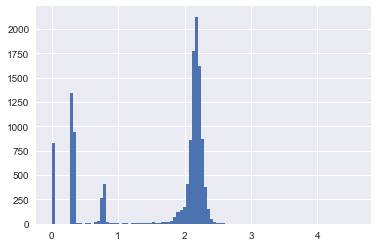

In [15]:
plt.hist(dataTrain["PTR_A"],bins=100);

### Обучение моделей

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.neighbors import KNeighborsRegressor

In [19]:
train=data[:separate].drop("Time",axis=1)
test=data[separate:].drop("Time",axis=1)

X_train,X_valid,y_train,y_valid=train_test_split(train.drop("PTR_A",axis=1),train["PTR_A"],
                                                 test_size=0.3,random_state=17,shuffle=False)

In [20]:
rf=RandomForestRegressor(random_state=17)
xgb=XGBRegressor(seed=17);

In [21]:
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train);

In [22]:
predictRF=rf.predict(X_valid)
predictXGB=xgb.predict(X_valid);

In [23]:
#RandomForest
mean_squared_error(y_valid,predictRF),mean_absolute_error(y_valid,predictRF),r2_score(y_valid,predictRF)

(0.15533097533325516, 0.2835531749220056, 0.64902526367201863)

In [24]:
#XGB
mean_squared_error(y_valid,predictXGB),mean_absolute_error(y_valid,predictXGB),r2_score(y_valid,predictXGB)

(0.10848786162263965, 0.18897742489169642, 0.75486860527270128)

### Очиста данных и создание новых признаков

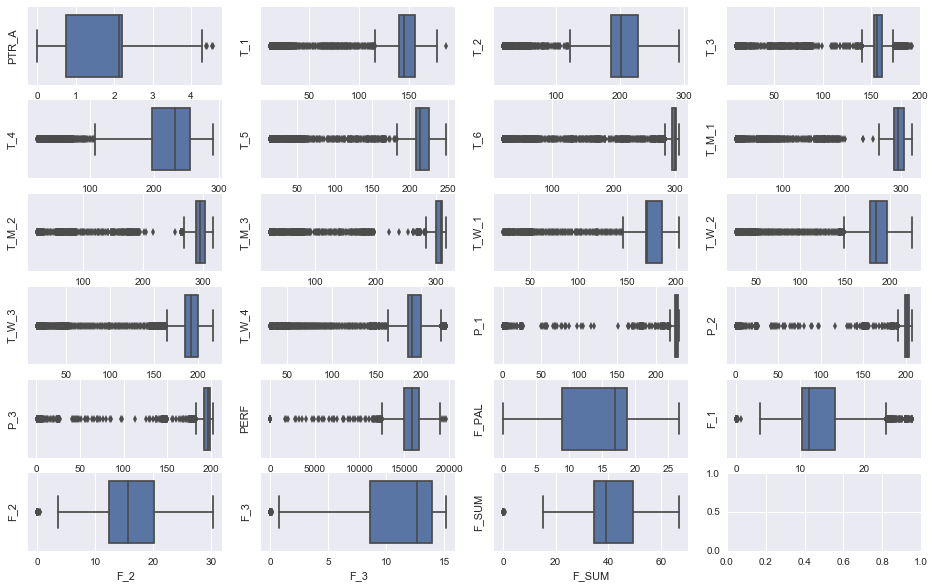

In [25]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(dataTrain.drop("Time",axis=1)):
    sns.boxplot(feat,data=dataTrain.drop("Time",axis=1), ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_ylabel(feat);

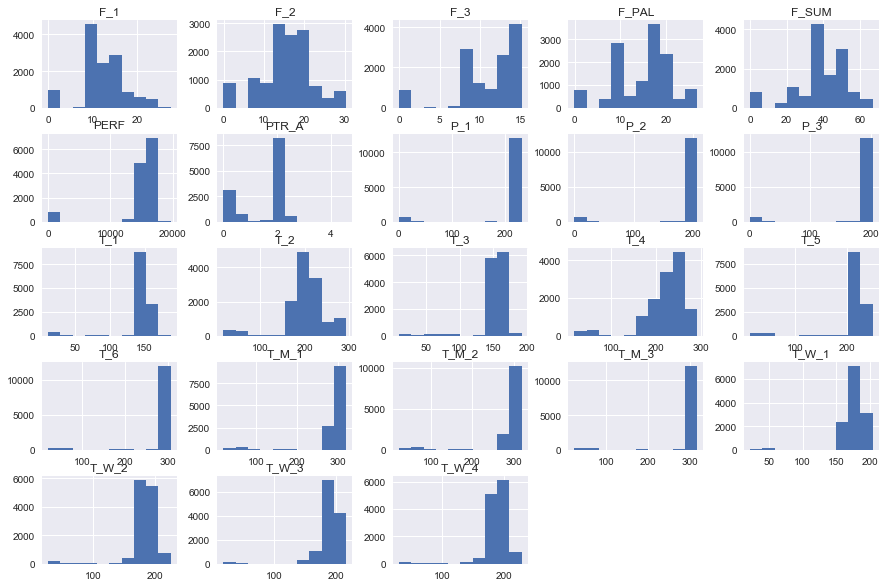

In [26]:
dataTrain.hist(figsize=(15,10));

In [27]:
train=data[:separate].drop("Time",axis=1)
test=data[separate:].drop("Time",axis=1)

X_train,X_valid,y_train,y_valid=train_test_split(train.drop("PTR_A",axis=1),train["PTR_A"],
                                                 test_size=0.3,random_state=17,shuffle=False)

In [28]:
# for i in train.columns:
#     train[i]=train[i][train[i]<train[i].quantile(0.975)]
#     train[i]=train[i][train[i]>train[i].quantile(0.025)]
# Не работает

In [30]:
#Новые фичи
data["min"]=data["Time"].apply(lambda x:x.minute)
data["hour"]=data["Time"].apply(lambda x:x.hour)
data["day"]=data["Time"].apply(lambda x:x.day)
data["month"]=data["Time"].apply(lambda x:x.month)
data["year"]=data["Time"].apply(lambda x:x.year)
data["is_month_start"]=data["Time"].apply(lambda x:x.is_month_start)
data["weekday"]=data["Time"].apply(lambda x:x.weekday())

### Тестирование новых фич

In [31]:
train=data[:separate].drop("Time",axis=1)
test=data[separate:].drop("Time",axis=1)

X_train,X_valid,y_train,y_valid=train_test_split(train.drop("PTR_A",axis=1),train["PTR_A"],
                                                 test_size=0.3,random_state=17,shuffle=False)

In [32]:
rf=RandomForestRegressor(random_state=17)
xgb=XGBRegressor(seed=17);

In [33]:
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train);

In [34]:
predictRF=rf.predict(X_valid)
predictXGB=xgb.predict(X_valid);

In [35]:
#RandomForest
mean_squared_error(y_valid,predictRF),mean_absolute_error(y_valid,predictRF),r2_score(y_valid,predictRF)

(0.17779073088576688, 0.32016551349722999, 0.59827681014482281)

In [36]:
#XGB
mean_squared_error(y_valid,predictXGB),mean_absolute_error(y_valid,predictXGB),r2_score(y_valid,predictXGB)

(0.10077697019392291, 0.19456142597777795, 0.7722915827583009)

In [37]:
#Новые фичи немного улучшили модель

In [38]:
data.drop("Time",axis=1,inplace=True)

----------

In [39]:
buf=data.copy()

In [ ]:
data=buf.copy()

In [41]:
#Создание временных лагов в 10 минут
for col in tqdm(data.columns):
    tmp=[]
    tmp.append(np.NaN)
    for i in range(1,len(data[col].values)):
        tmp.append(data[col][i]+data[col][i-1])
    data[col+"lag1"]=tmp

100%|██████████| 30/30 [00:23<00:00,  1.26it/s]


### Тестирование новых фич

In [45]:
train=data[:separate]
test=data[separate:]

X_train,X_valid,y_train,y_valid=train_test_split(train.drop(["PTR_A","is_month_startlag1"],axis=1),train["PTR_A"],
                                                 test_size=0.3,random_state=17,shuffle=False)

In [47]:
xgb=XGBRegressor(seed=17);

In [48]:
xgb.fit(X_train,y_train);

In [49]:
predictXGB=xgb.predict(X_valid);

In [50]:
#XGB
mean_squared_error(y_valid,predictXGB),mean_absolute_error(y_valid,predictXGB),r2_score(y_valid,predictXGB)

(0.010351012009865556, 0.017761715404847424, 0.97661159531705755)

In [ ]:
#Новые фичи улучшили модель

## Итоговая проверка (данных test модель раньше не видела)

In [59]:
test=data[separate:]

In [60]:
X=test.drop("PTR_A",axis=1)
y=test["PTR_A"]

In [62]:
predictXGB=xgb.predict(X.drop("is_month_startlag1",axis=1))

In [63]:
#XGB
mean_squared_error(y,predictXGB),mean_absolute_error(y,predictXGB),r2_score(y,predictXGB)

(0.00010237368879558946, 0.0065174727814724942, 0.98446949163568742)

## Проверка на ошибки

In [74]:
train=data[:separate].drop(["is_month_startlag1"],axis=1)
test=data[separate:].drop(["is_month_startlag1"],axis=1)

In [75]:
xgb=XGBRegressor(seed=17);

In [76]:
xgb.fit(train.drop("PTR_A",axis=1),train["PTR_A"]);

In [72]:
predictXGB=xgb.predict(test.drop("PTR_A",axis=1));

In [77]:
#XGB
mean_squared_error(test["PTR_A"],predictXGB),mean_absolute_error(test["PTR_A"],predictXGB),r2_score(test["PTR_A"],predictXGB)

(0.00010575509964978814, 0.0065893679693804367, 0.98395651774393711)

### Итоговый скор 

$$R^2=0.98395651774393711 $$